# Vizualization:
    - Heat mapa
    

## Important libraries

In [50]:
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import jaccard_score
from matplotlib.colors import ListedColormap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

#from scripts import visualization
import importlib as imp

# Import knihoven
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
#imp.reload(visualization)

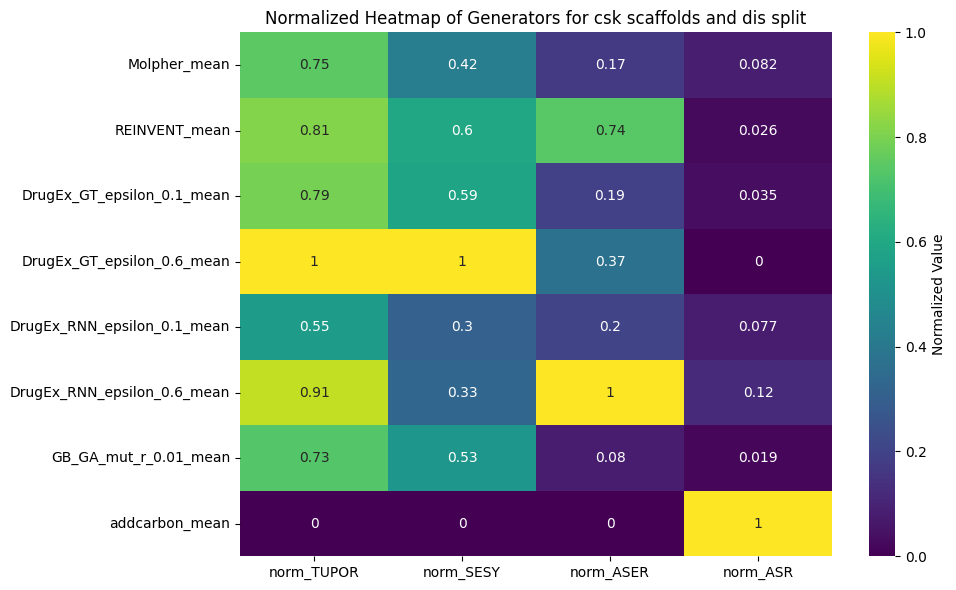

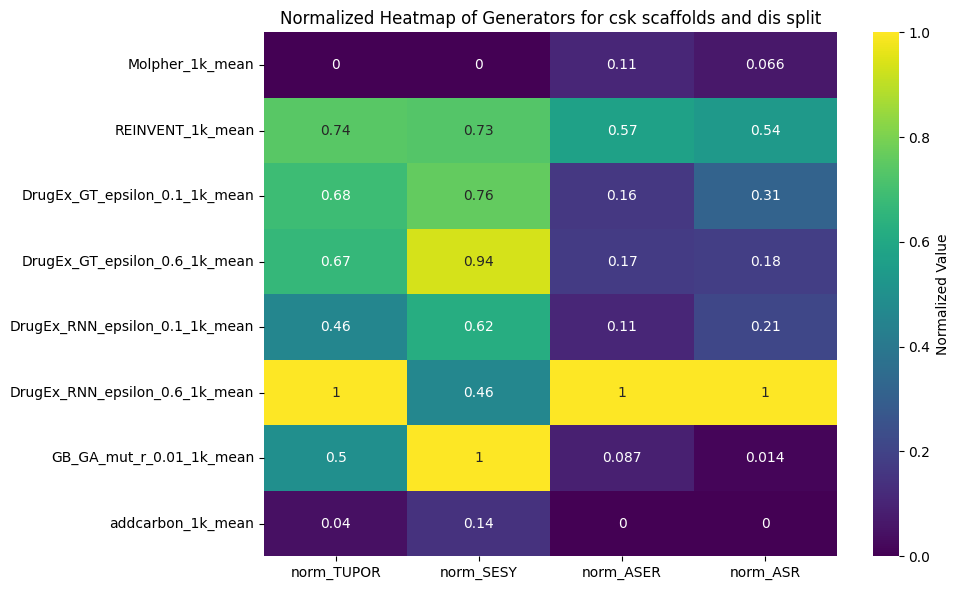

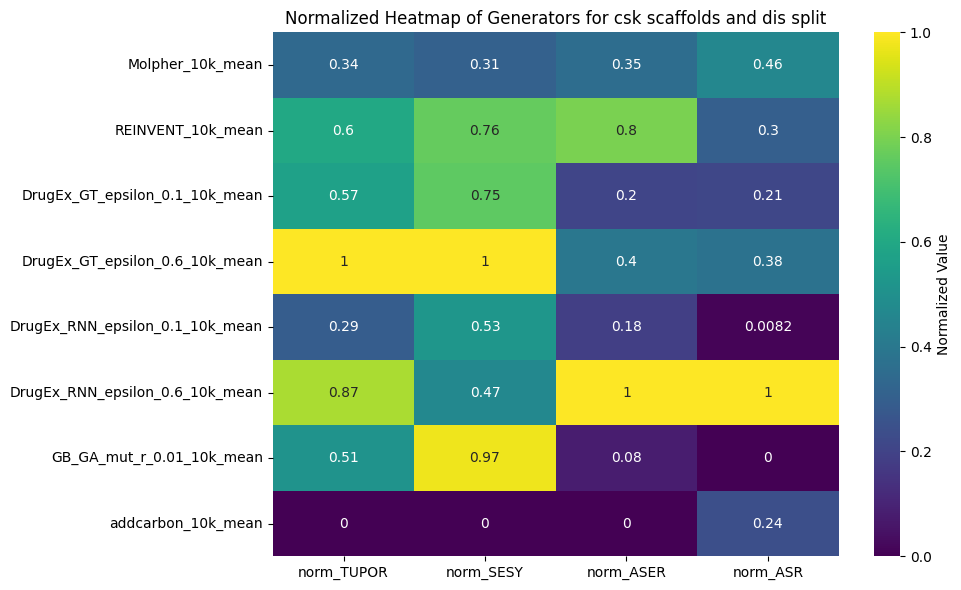

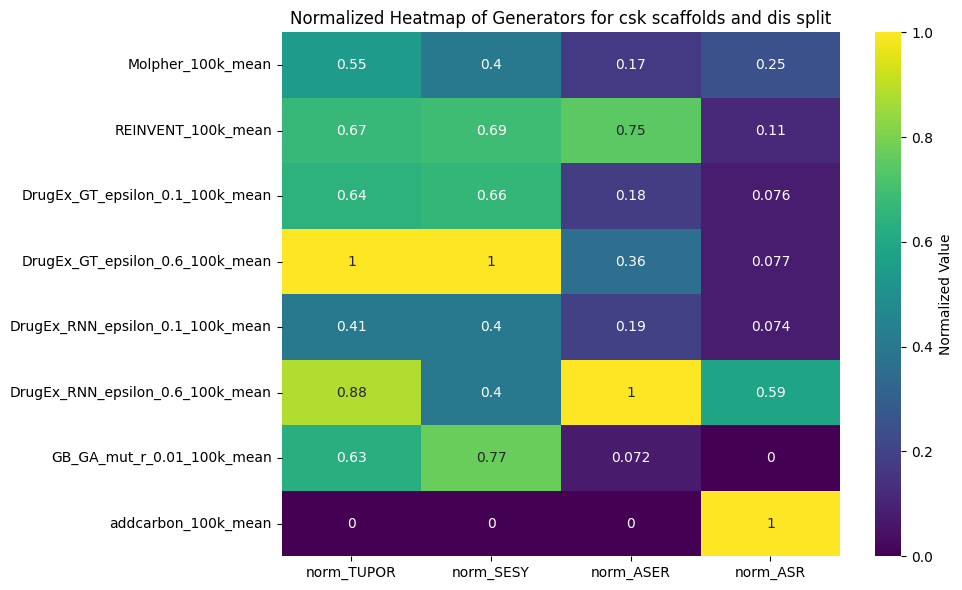

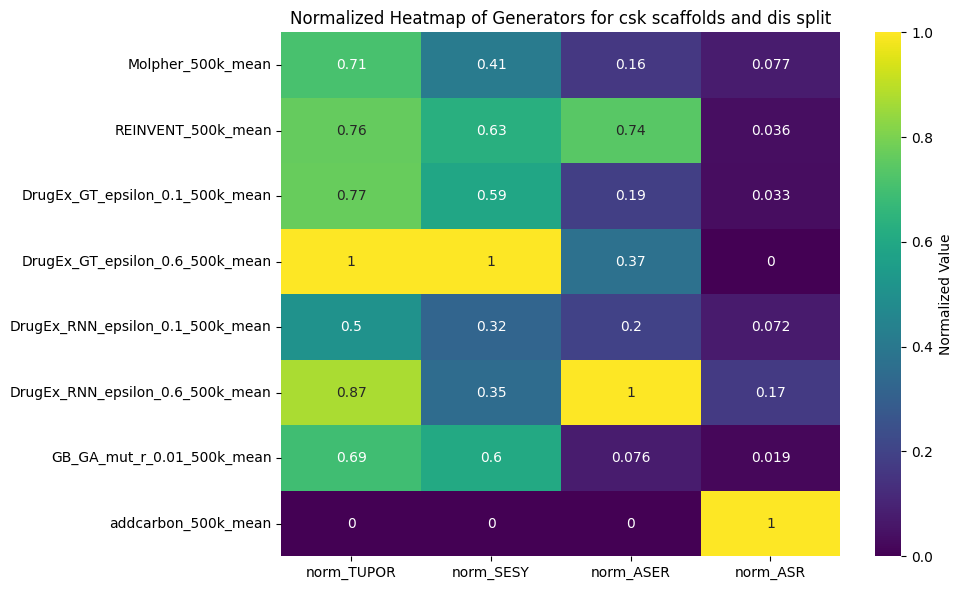

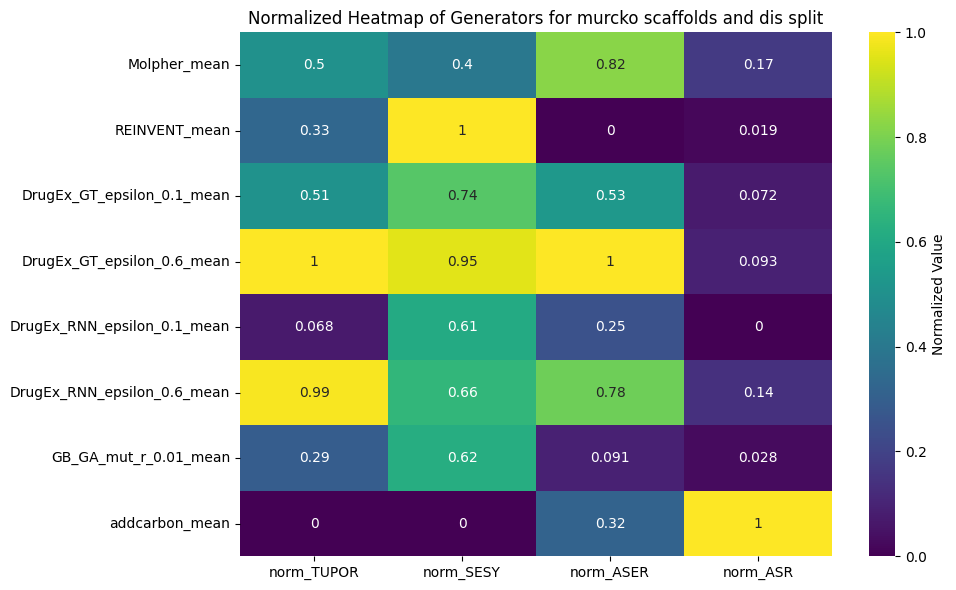

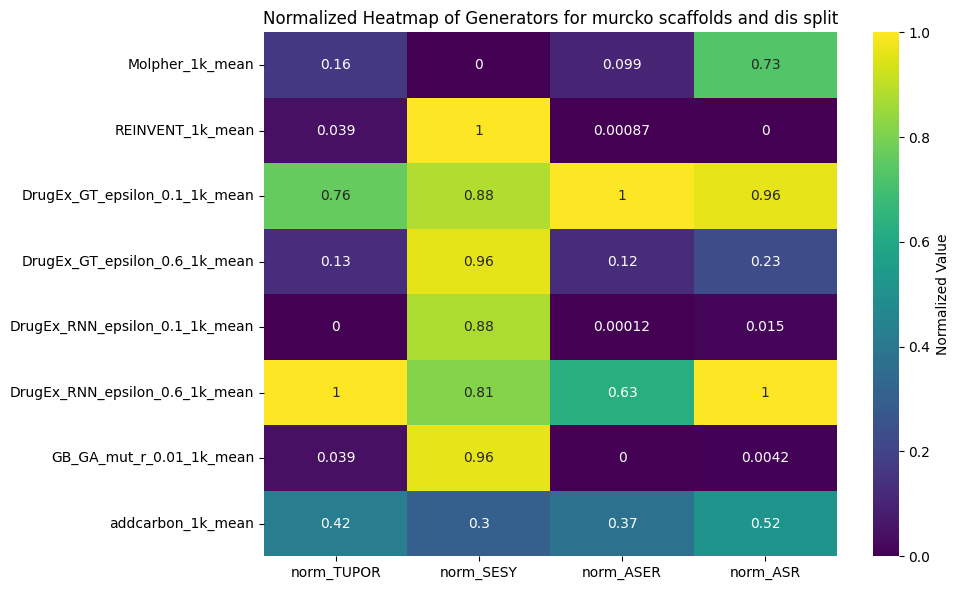

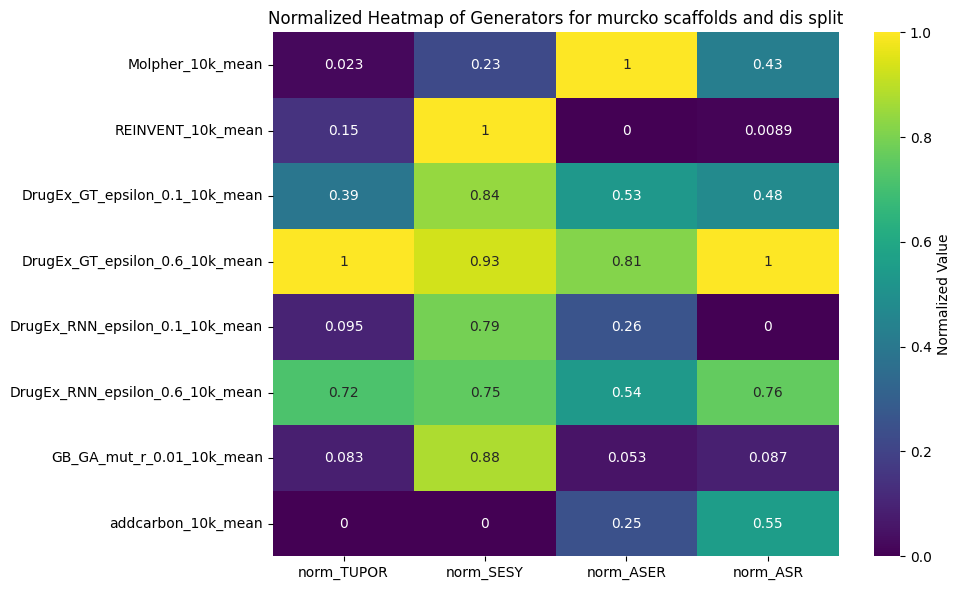

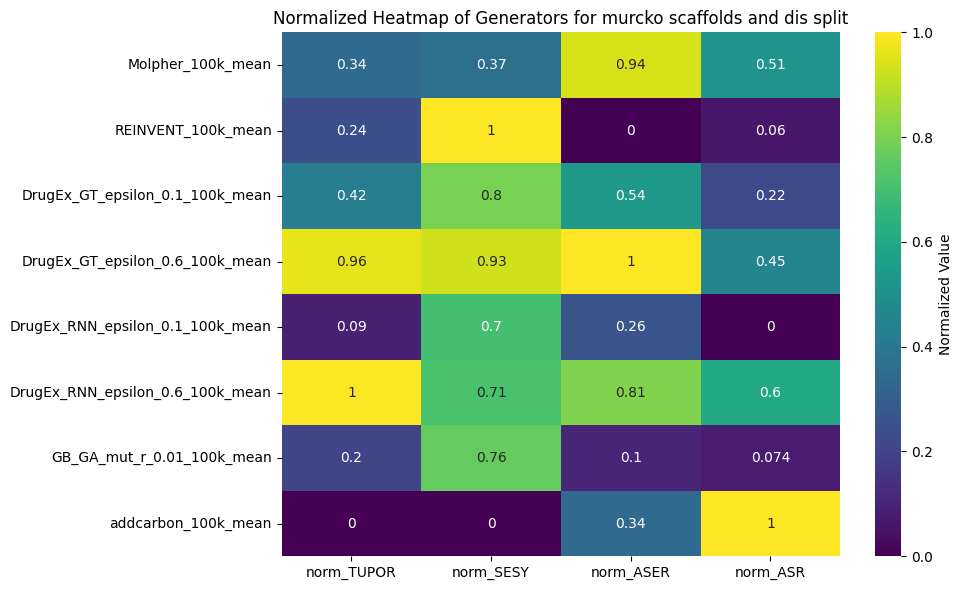

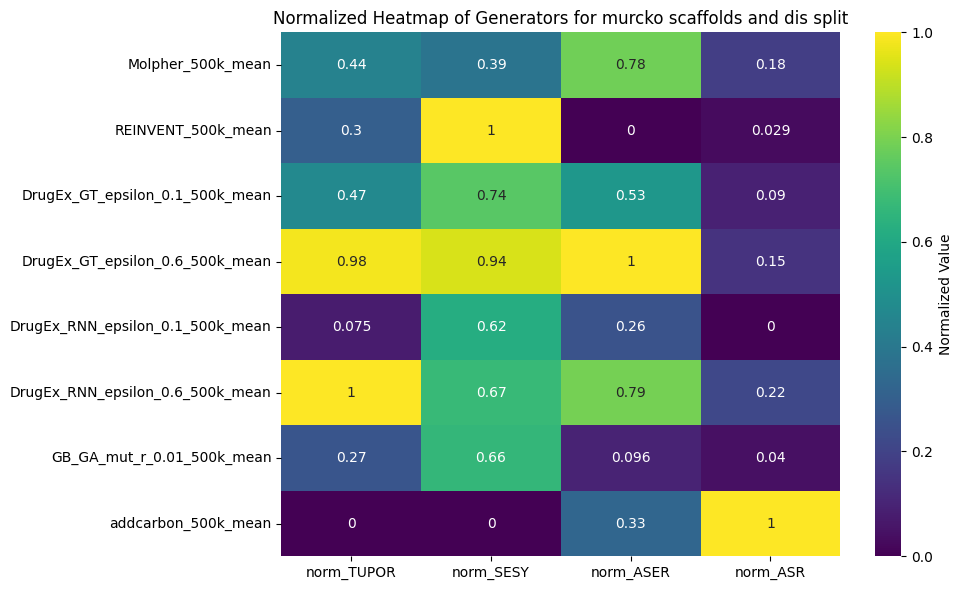

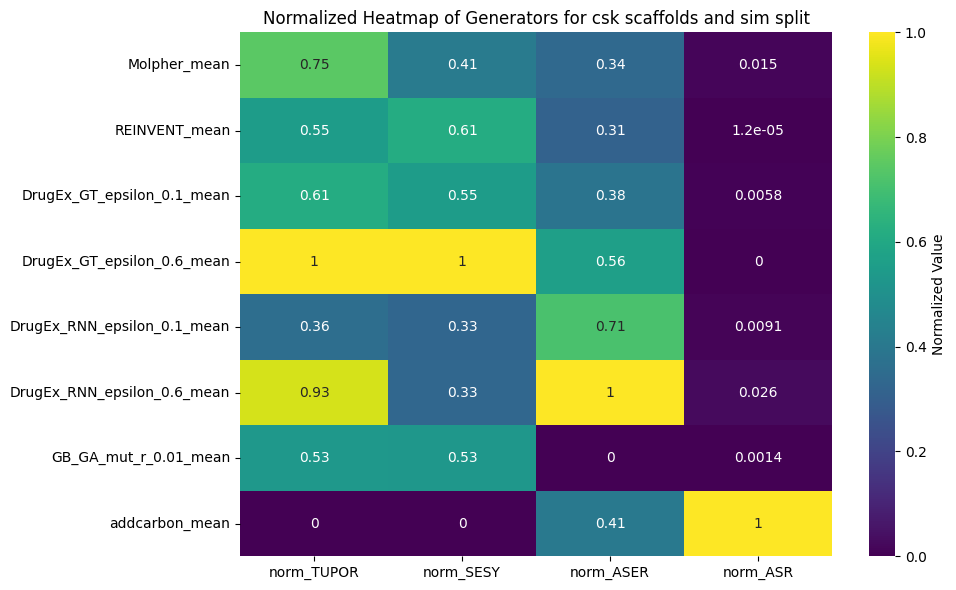

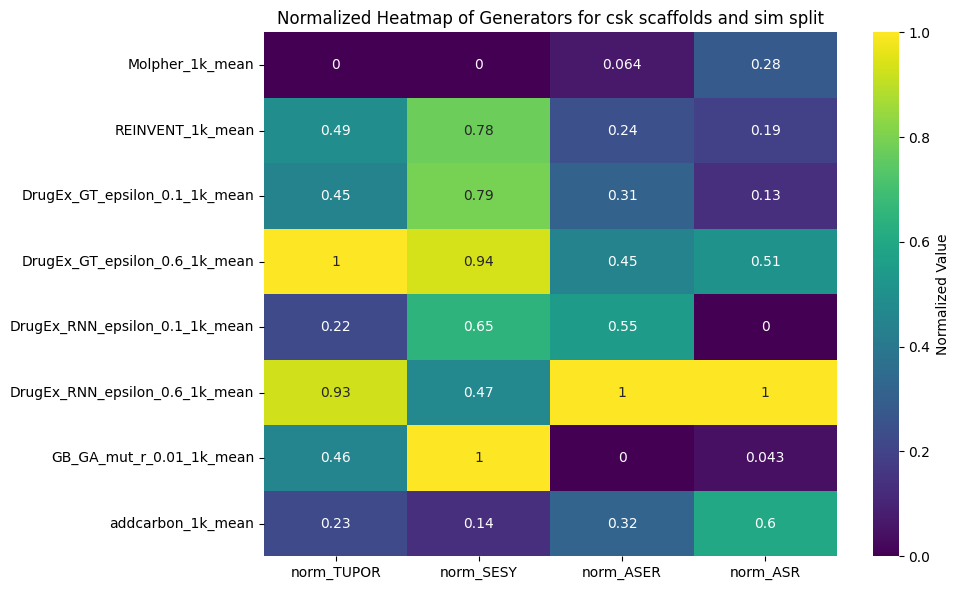

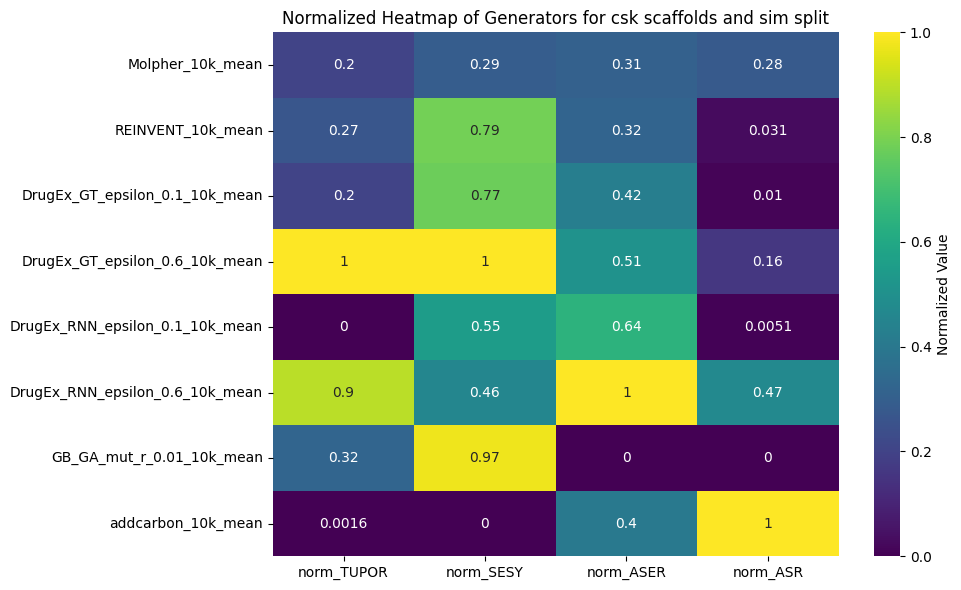

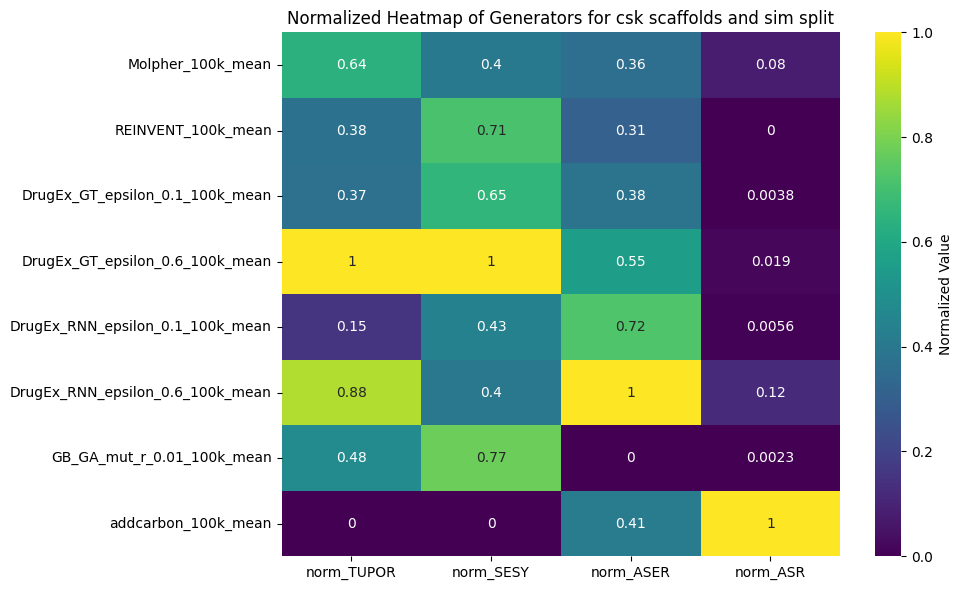

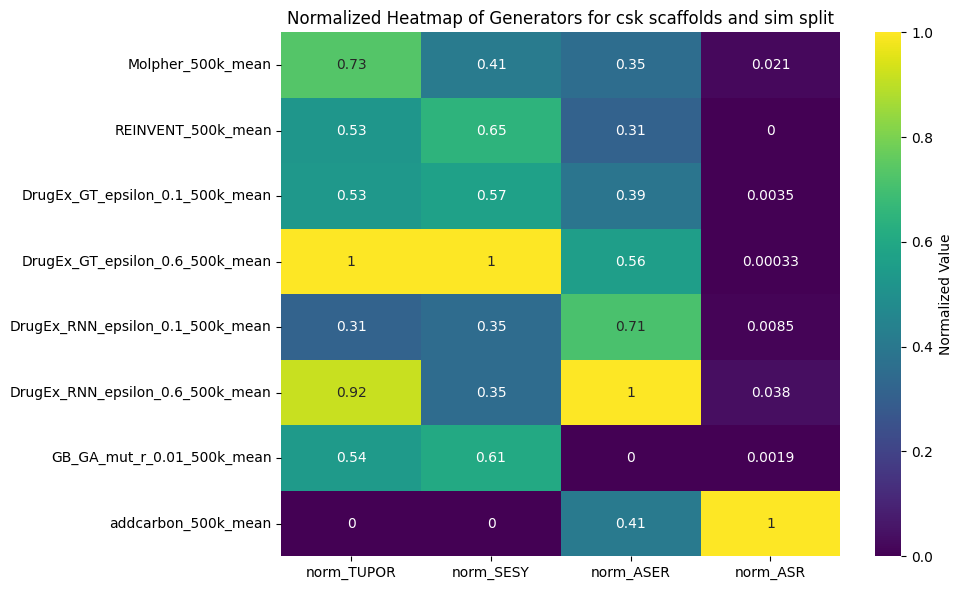

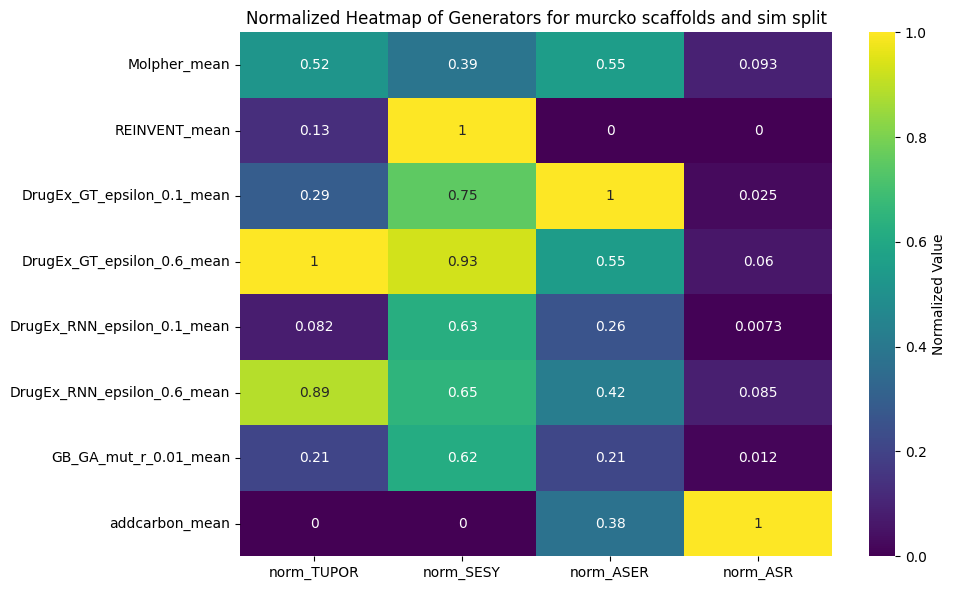

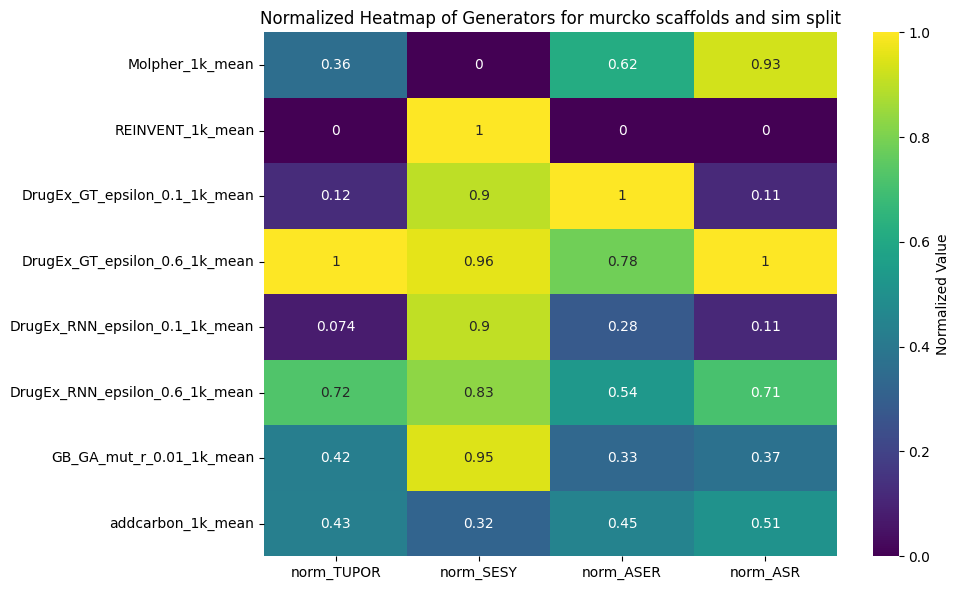

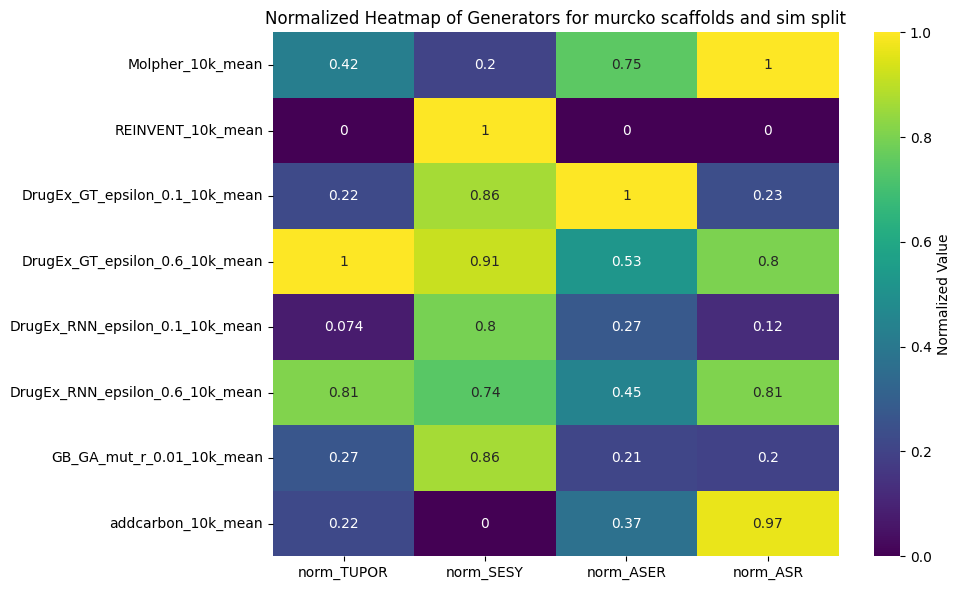

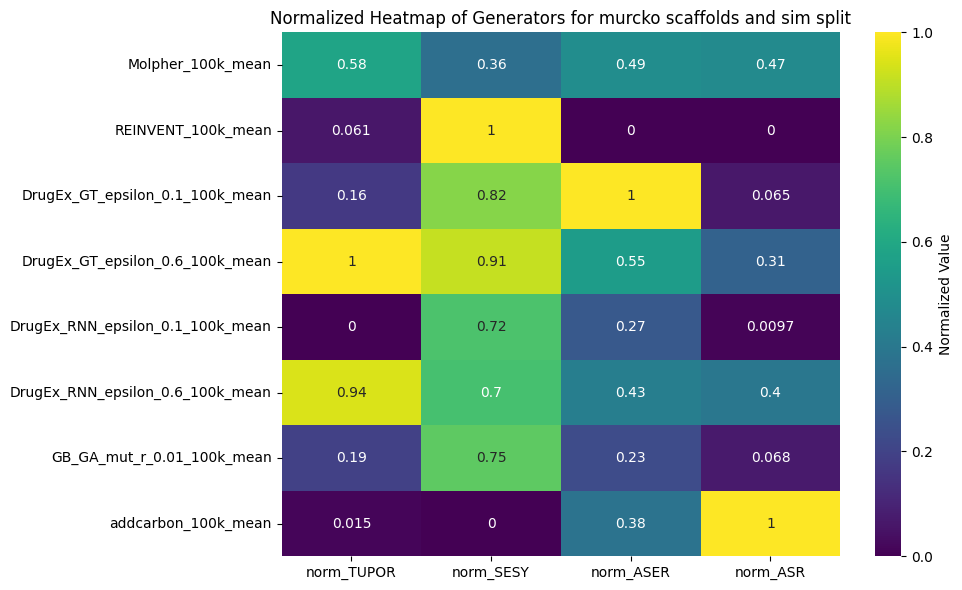

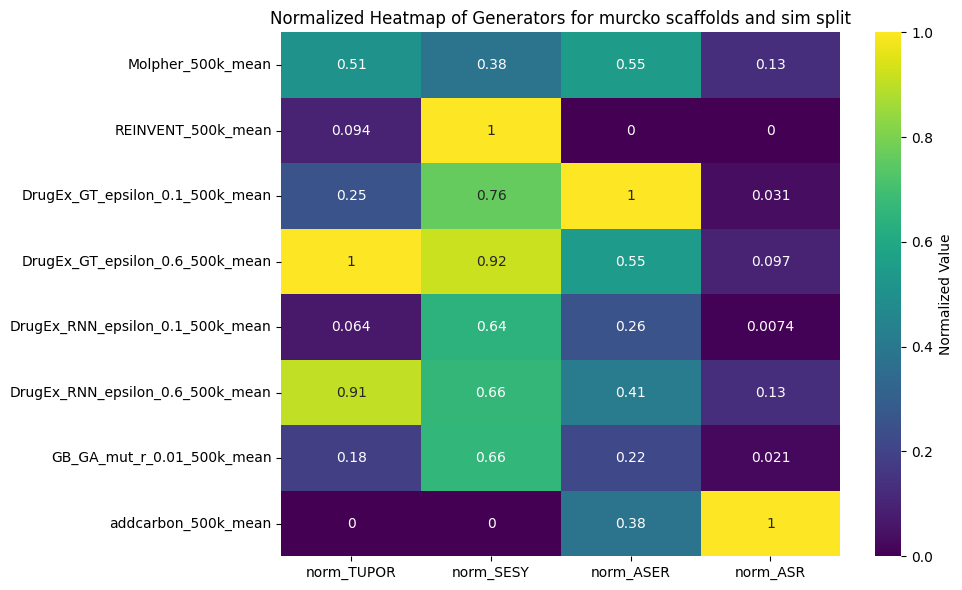

In [24]:
for type_split in ['dis','sim']:
    for scaf in ['csk', 'murcko']:
        for _ in ['','_1k', '_10k', '_100k', '_500k']:
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{_}.csv")
    
            df['norm_TUPOR'] =  df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            df['norm_SESY'] =  df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            df['norm_ASER'] =  df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
            
            normalized_df = df[[ 'norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
            normalized_df.index = df.name.tolist()
            
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'})
            plt.title(f'Normalized Heatmap of Generators for {scaf} scaffolds and {type_split} split')
    
            plt.tight_layout()
            plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_{_}.png')
            plt.show()
    

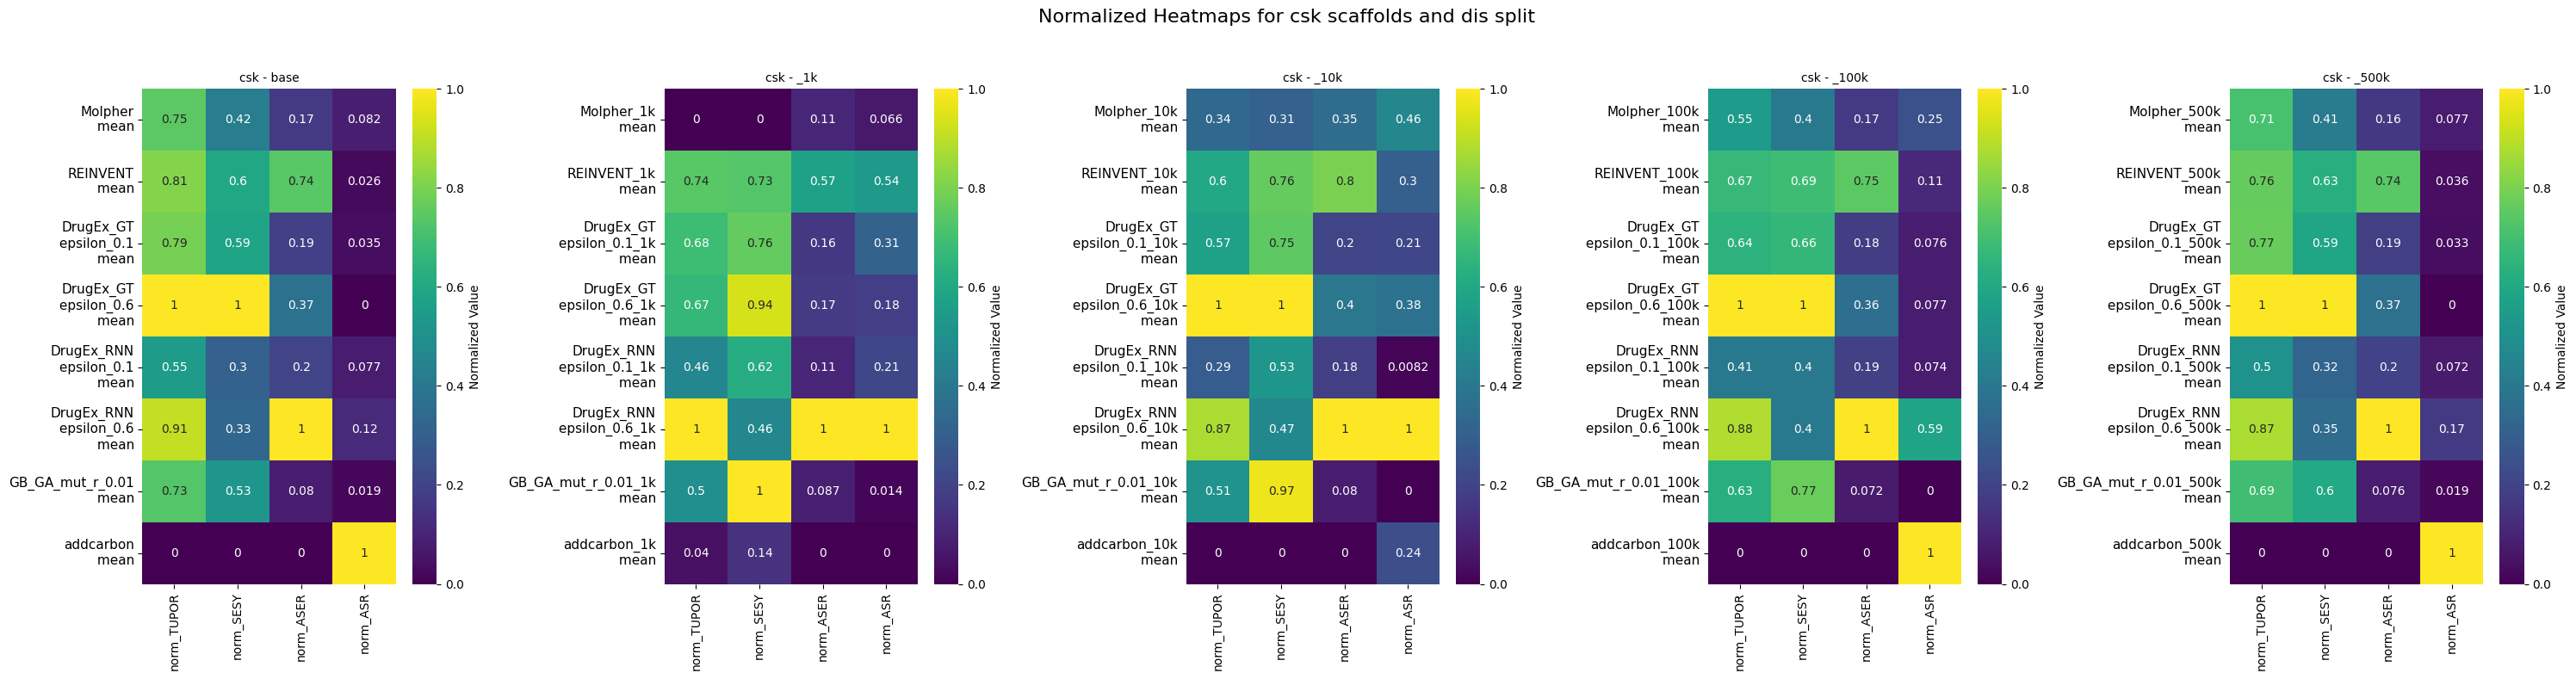

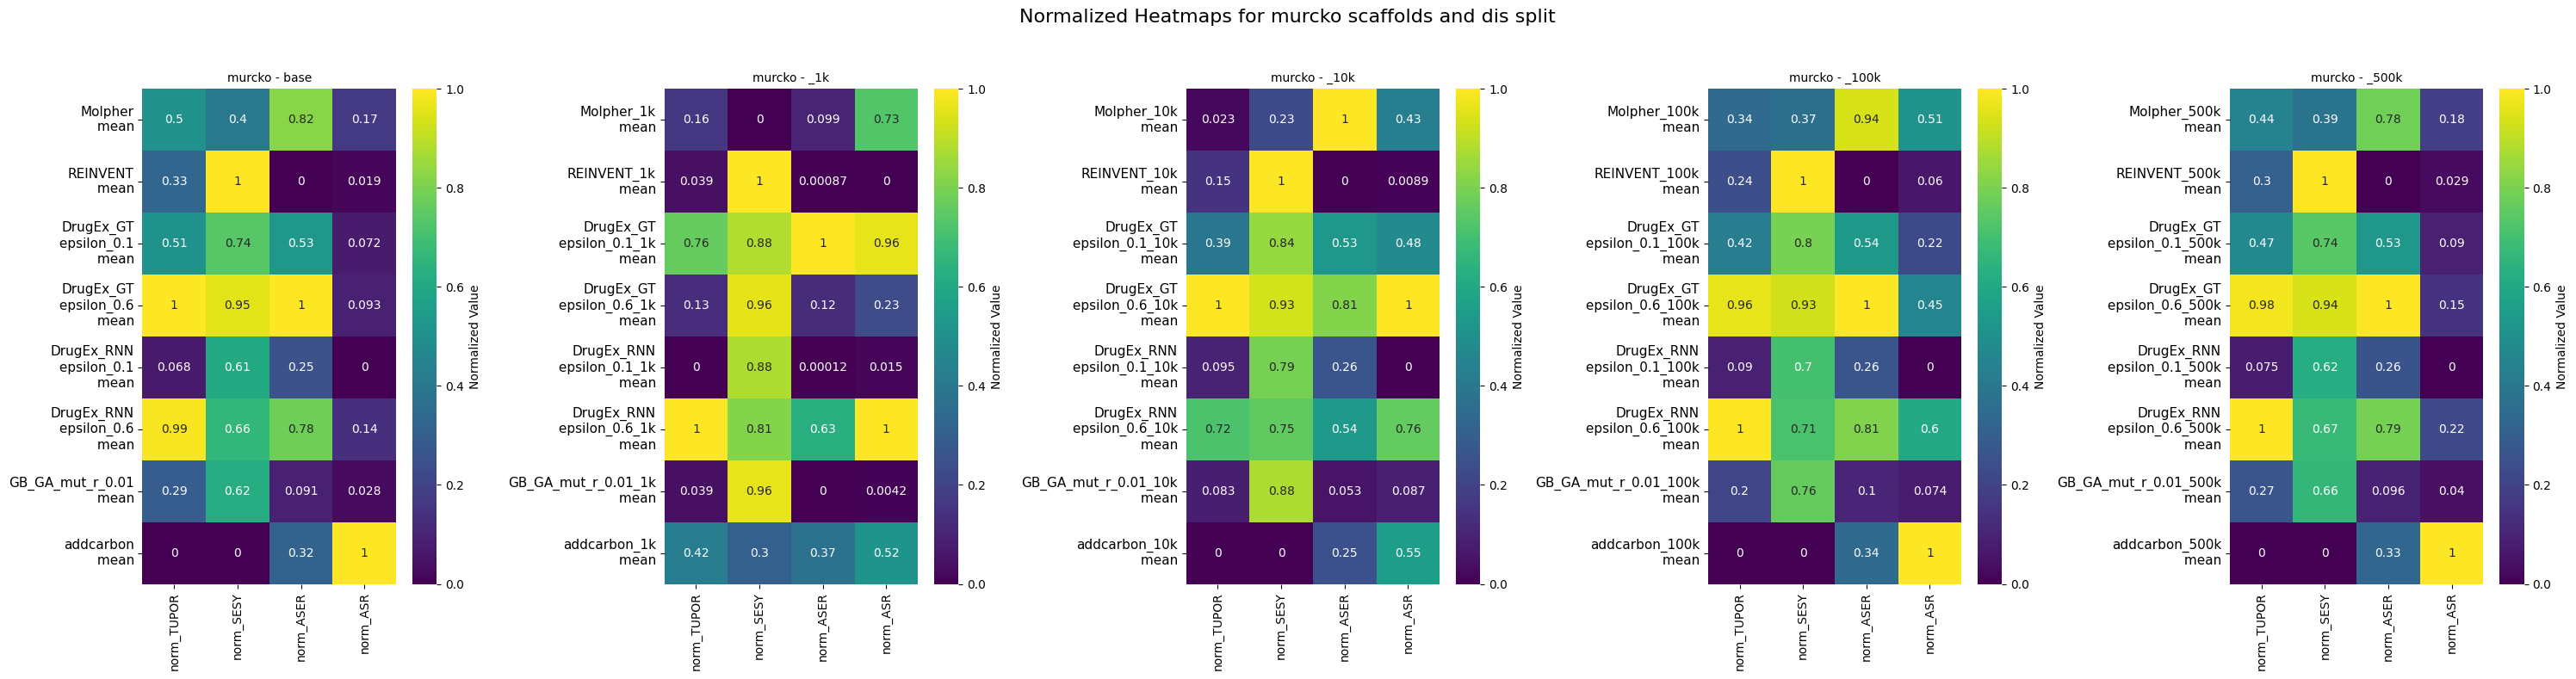

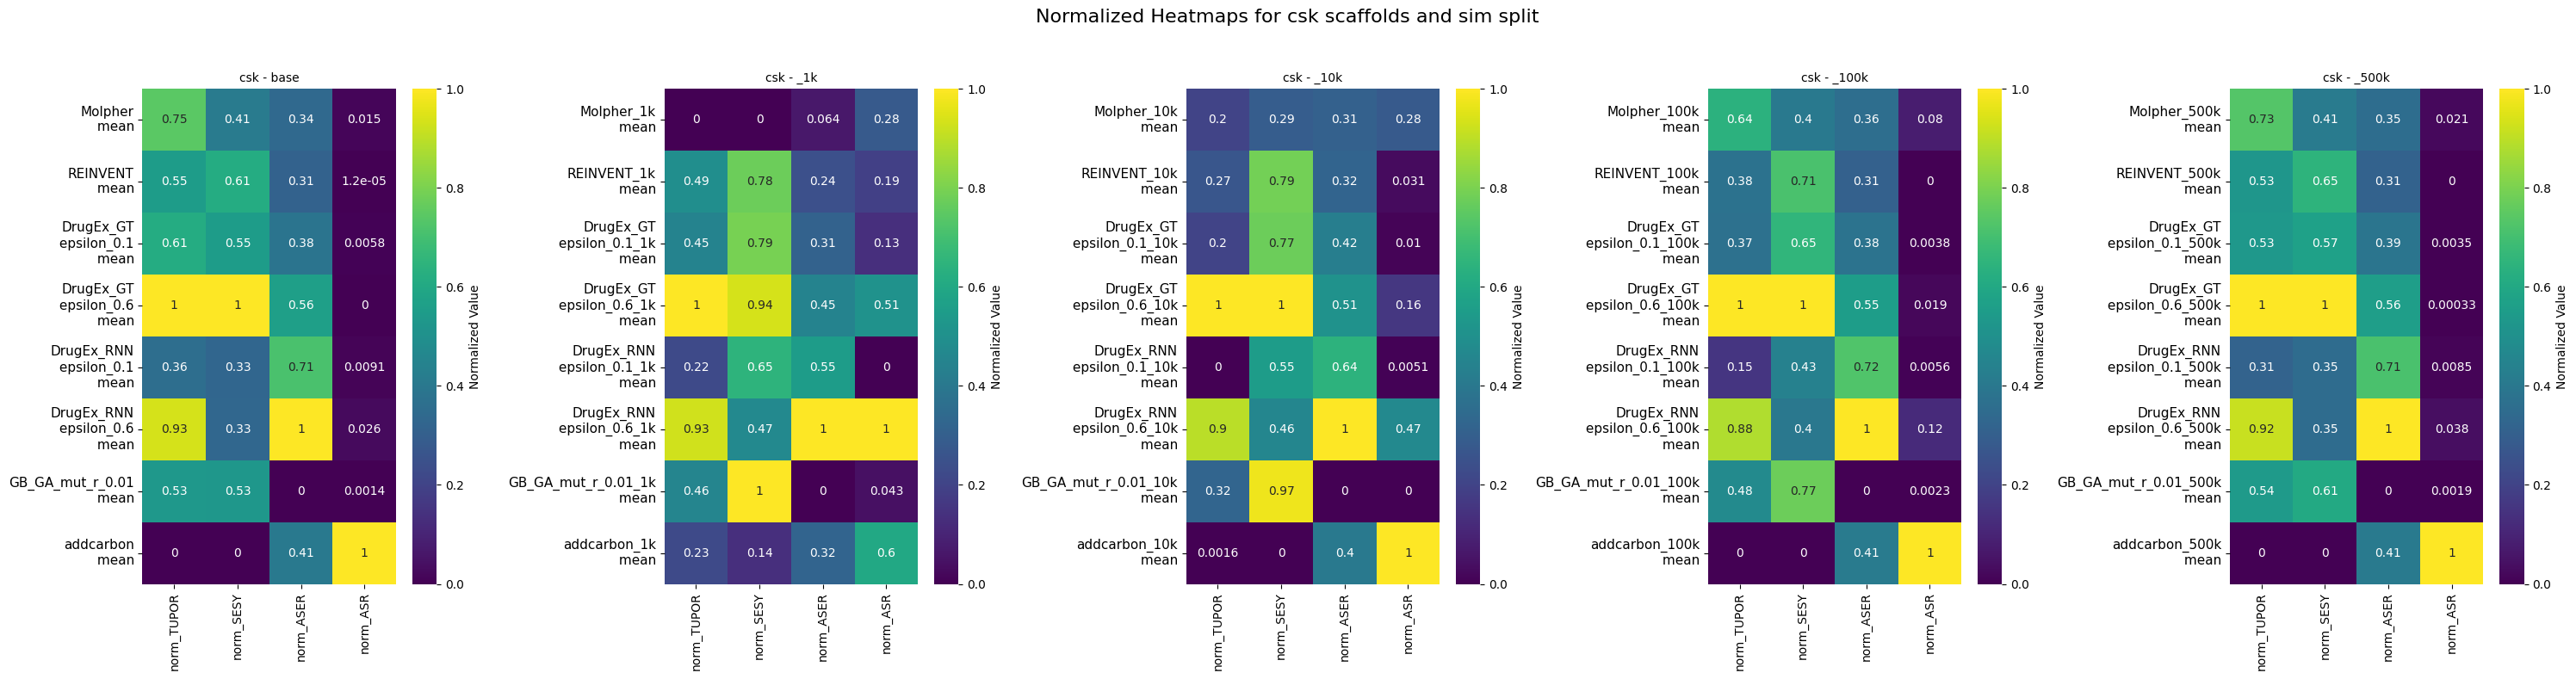

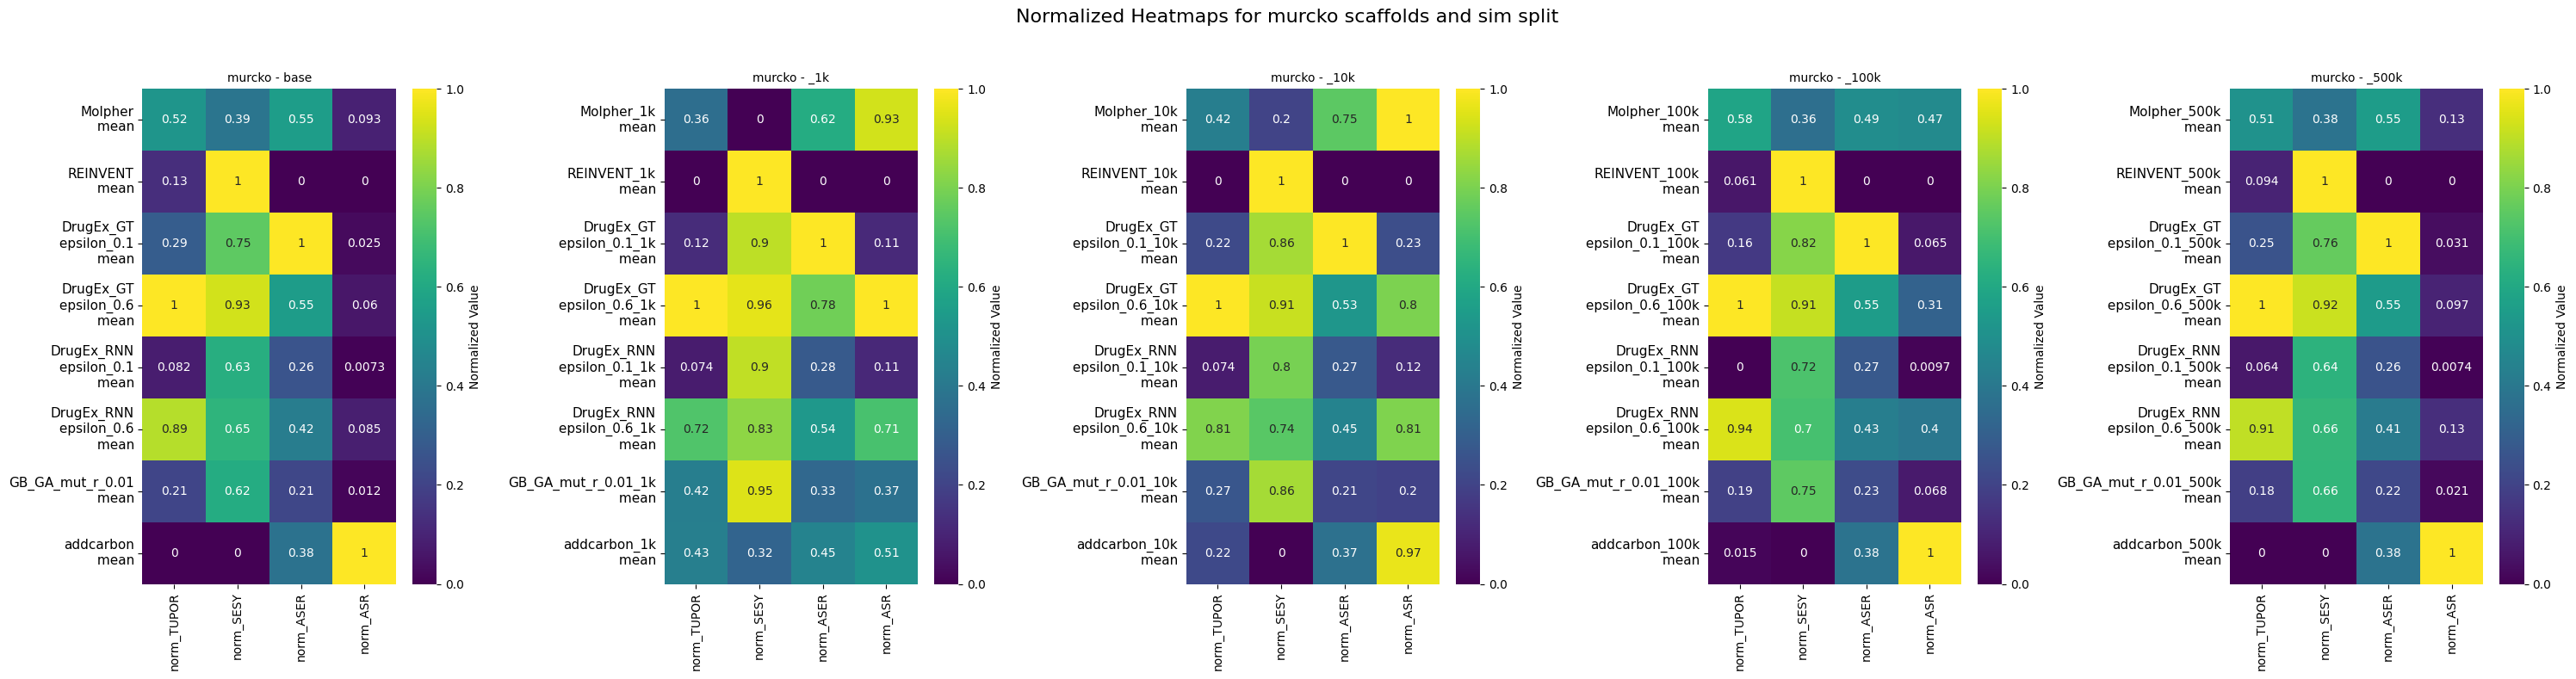

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for type_split in ['dis', 'sim']:
    for scaf in ['csk', 'murcko']:
        # Vytvoření figure pro subploty (1 řádek a 5 sloupců pro subsety)
        fig, axes = plt.subplots(1, 5, figsize=(30, 8))  # 1 řádek, 5 sloupců pro subsety

        # Iterace přes subsety (base, 1k, 10k, 100k, 500k)
        for k, subset in enumerate(['', '_1k', '_10k', '_100k', '_500k']):
            # Načtení datového rámce
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}{subset}.csv")
            
            # Normalizace metrik
            df['norm_TUPOR'] = df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
            df['norm_SESY'] = df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
            df['norm_ASER'] = df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
            df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
            
            # Výběr normalizovaných sloupců
            normalized_df = df[['norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
            normalized_df.index = df.name.tolist()  # Použití názvů jako index
            
            # Výběr správného subplotu pro zobrazení
            ax = axes[k]  # Umístění v mřížce 1x5 pro subsety (1 řádek, 5 sloupců)
            
            # Vykreslení heatmapy pro každý subset
            sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax)
            
            # Nastavení názvu s zalomením textu pro generátory a zmenšení písma
            ax.set_title(f'{scaf} - {subset if subset else "base"}', fontsize=10, wrap=True)

            # Zalomit názvy generátorů na ose Y
            new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
            ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=11)

        # Přidání celkového názvu pro rozdělení (DIS nebo SIM)
        fig.suptitle(f'Normalized Heatmaps for {scaf} scaffolds and {type_split} split', fontsize=16)
        
        # Přizpůsobení rozložení a uložení obrázku
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis
        plt.savefig(f'img/heat_mapa/heat_mapa_{type_split}_{scaf}_1x5.png')
        plt.show()


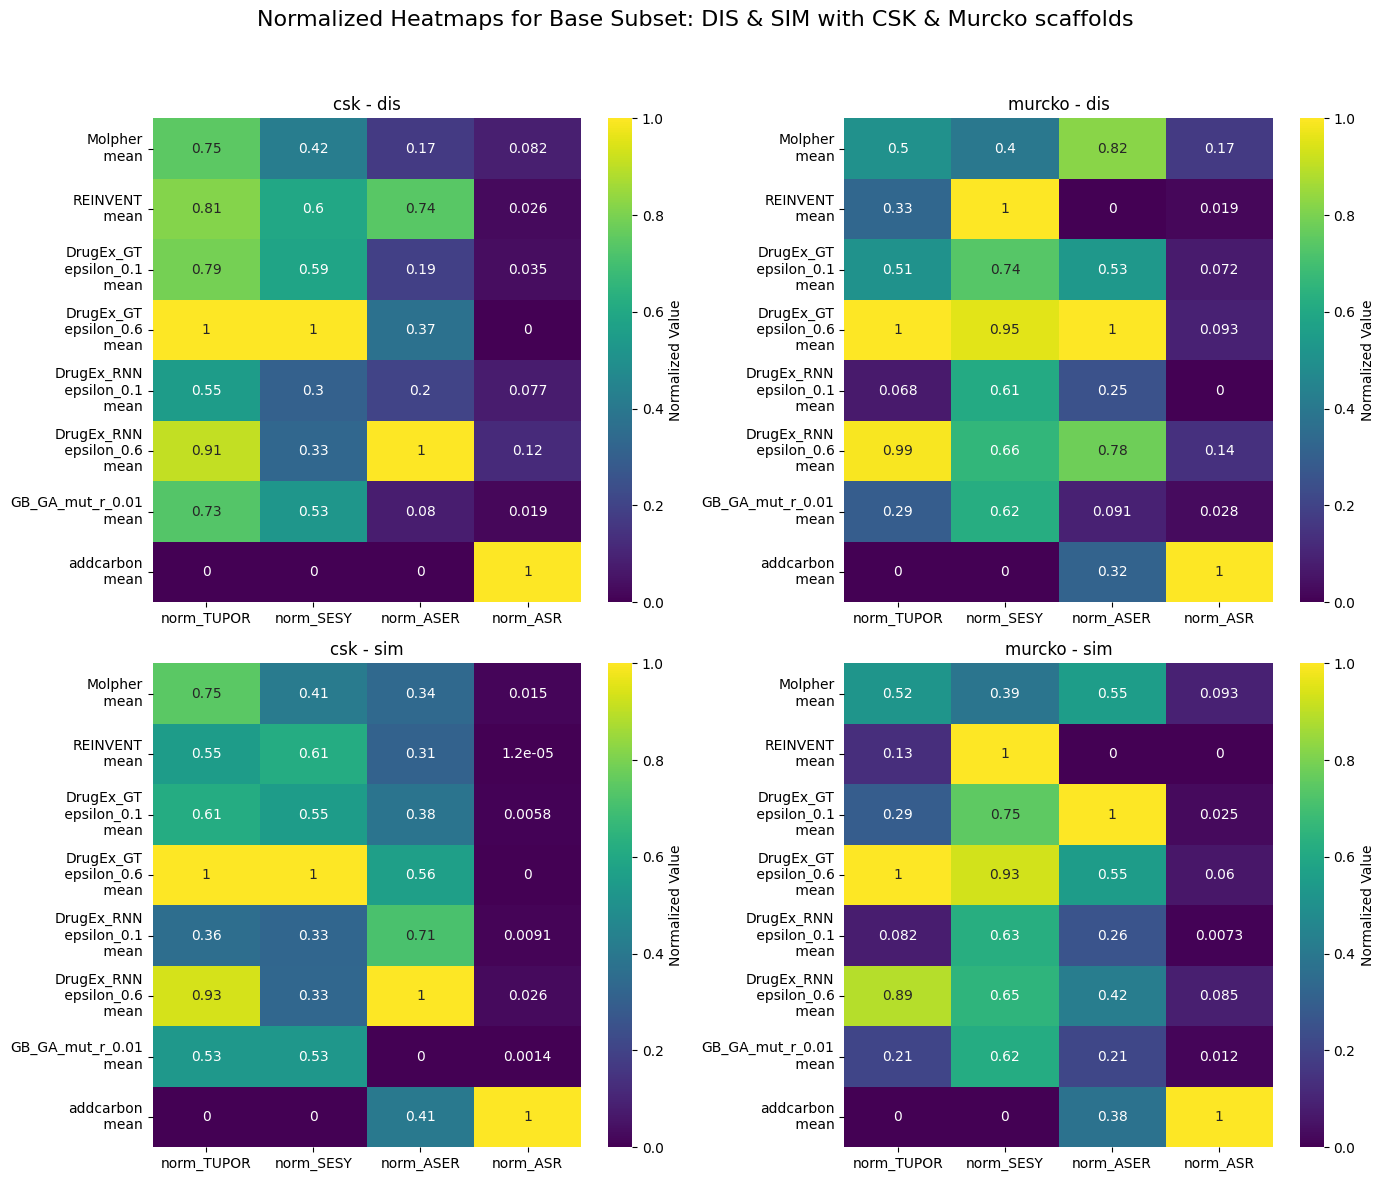

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vytvoření figure pro subploty (2 řádky a 2 sloupce pro každý rozdělený graf)
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 řádky, 2 sloupce

# Iterace přes typy rozdělení (DIS, SIM) a scaffoldy (CSK, Murcko)
for i, type_split in enumerate(['dis', 'sim']):
    for j, scaf in enumerate(['csk', 'murcko']):
        # Načtení datového rámce pouze pro subset "base"
        df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{scaf}_scaffolds/{type_split}/mean_{scaf}_{type_split}.csv")
        
        # Normalizace metrik
        df['norm_TUPOR'] = df['TUPOR'].apply(lambda x: (x - df['TUPOR'].min()) / (df['TUPOR'].max() - df['TUPOR'].min()))
        df['norm_SESY'] = df['SESY'].apply(lambda x: (x - df['SESY'].min()) / (df['SESY'].max() - df['SESY'].min()))
        df['norm_ASER'] = df['ASER'].apply(lambda x: (x - df['ASER'].min()) / (df['ASER'].max() - df['ASER'].min()))
        df['norm_ASR'] = df['ASR'].apply(lambda x: (x - df['ASR'].min()) / (df['ASR'].max() - df['ASR'].min()))
        
        # Výběr normalizovaných sloupců
        normalized_df = df[['norm_TUPOR', 'norm_SESY', 'norm_ASER', 'norm_ASR']]
        normalized_df.index = df.name.tolist()  # Použití názvů jako index
        
        # Výběr správného subplotu pro zobrazení
        ax = axes[i, j]  # Umístění v mřížce 2x2 pro různé kombinace (DIS, SIM) a (CSK, MURCKO)
        
        # Vykreslení heatmapy pro každý subset
        sns.heatmap(normalized_df, annot=True, cmap='viridis', cbar_kws={'label': 'Normalized Value'}, ax=ax)
        
        # Nastavení názvu s zalomením textu pro generátory a zmenšení písma
        ax.set_title(f'{scaf} - {type_split}', fontsize=12)

        # Zalomit názvy generátorů na ose Y
        new_labels = [label.get_text().replace('_epsilon', '\n epsilon').replace('_mean', '\n mean') for label in ax.get_yticklabels()]
        ax.set_yticklabels(new_labels, rotation=0, ha="right", fontsize=10)

# Přidání celkového názvu pro všechny heatmapy
fig.suptitle('Normalized Heatmaps for Base Subset: DIS & SIM with CSK & Murcko scaffolds', fontsize=16)

# Přizpůsobení rozložení a uložení obrázku
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Rezerva pro nadpis
plt.savefig(f'img/heat_mapa/heat_mapa_base_all.png')
plt.show()
